In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
import seaborn as sns
import datetime as dt
from scipy import stats
from matplotlib import rcParams
pd.set_option("display.max_columns", 101)

In [4]:
# folder_path_pavi = "/content/drive/My Drive/Projects and research stuffs/Project - PsychoMusic/"

data = pd.read_csv('data.csv')
print(data.head())


   track id      genre   amazement   solemnity   tenderness   nostalgia  \
0         1  classical           0           1            0           0   
1         1  classical           0           0            0           1   
2         1  classical           0           0            0           1   
3         1  classical           0           0            0           0   
4         1  classical           0           0            0           1   

    calmness   power   joyful_activation   tension   sadness   mood   liked  \
0          0       0                   1         1         0      3       1   
1          0       0                   0         0         0      3       0   
2          0       0                   0         0         1      3       0   
3          1       0                   0         0         0      3       0   
4          1       0                   0         0         0      4       0   

    disliked   age   gender  mother tongue  
0          0    21        1  

### Check datatypes and understand the distribution of data

In [439]:
print(data.dtypes)

track id               int64
 genre                object
 amazement             int64
 solemnity             int64
 tenderness            int64
 nostalgia             int64
 calmness              int64
 power                 int64
 joyful_activation     int64
 tension               int64
 sadness               int64
 mood                  int64
 liked                 int64
 disliked              int64
 age                   int64
 gender                int64
 mother tongue        object
dtype: object


#### Check missing values in data

In [440]:
print(data.isnull().sum())

track id              0
 genre                0
 amazement            0
 solemnity            0
 tenderness           0
 nostalgia            0
 calmness             0
 power                0
 joyful_activation    0
 tension              0
 sadness              0
 mood                 0
 liked                0
 disliked             0
 age                  0
 gender               0
 mother tongue        0
dtype: int64


In [441]:
# # Convert to tidy data
# # Combine emotions
# emotions = [' amazement', ' solemnity', ' tenderness', ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension', ' sadness']
# rating_subset = data[emotions]
# max_ratings = rating_subset.values.argmax(1)
# emo_rating = []
# for i in max_ratings:
#   emo_rating.append(rating_subset.columns[i].strip())

# data['emotion_rating'] = emo_rating
# data = data.drop(emotions, axis=1)


In [442]:
# Combine Liked and disliked
rating_subset = data[[' liked', ' disliked']]
max_ratings = rating_subset.values.argmax(1)

emo_rating = []
for i in max_ratings:
        emo_rating.append(rating_subset.columns[i].strip())

data['liked_or_disliked'] = emo_rating
data = data.drop([' liked', ' disliked'], axis=1)


In [443]:
data.describe()

,track id,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,age,gender
count,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000
mean,171.121565,0.133103,0.198882,0.184489,0.258237,0.304627,0.182110,0.255145,0.224813,0.183656,3.493874,31.850601,0.456167
std,116.888669,0.339707,0.399183,0.387906,0.437691,0.460277,0.385958,0.435968,0.417484,0.387227,0.991124,12.457801,0.498105
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,23.000000,0.000000
50%,164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,28.000000,0.000000
75%,278.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,37.000000,1.000000
max,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,99.000000,1.000000


#### Exploratory Data Analysis

In [444]:
# Checking distribution of numerical data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = data.select_dtypes(include=numerics)

plt.figure(figsize = (15, 10))
# sns.pairplot(numeric_df, diag_kind = 'kde') # Bad choice takes long time to load (more features)

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [5]:
# 15 to 60 ages targeted
# Most mood values in 3 and 4 (feel good mood values)
data = pd.read_csv('updated_data1.csv')

['classical' 'rock' 'electronic' 'pop']


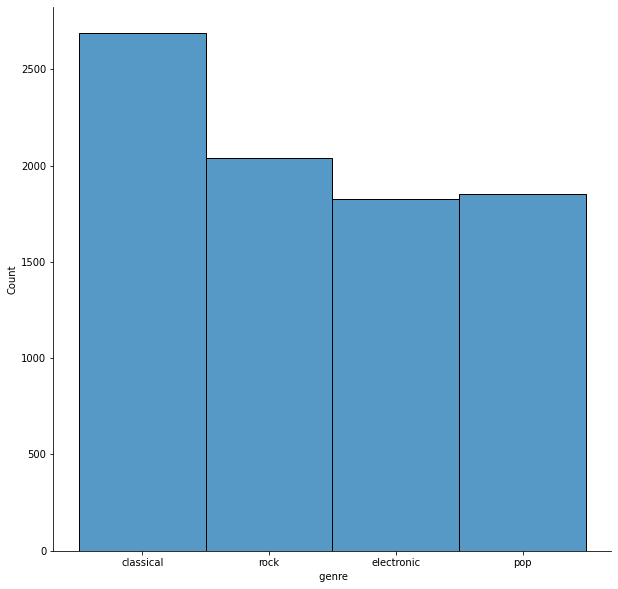

In [11]:
# Genre information
print(data[' genre'].unique())
plt.figure(figsize = (10, 10))
sns.histplot(data[' genre'])
sns.despine()
plt.savefig("genre_dist.png") 


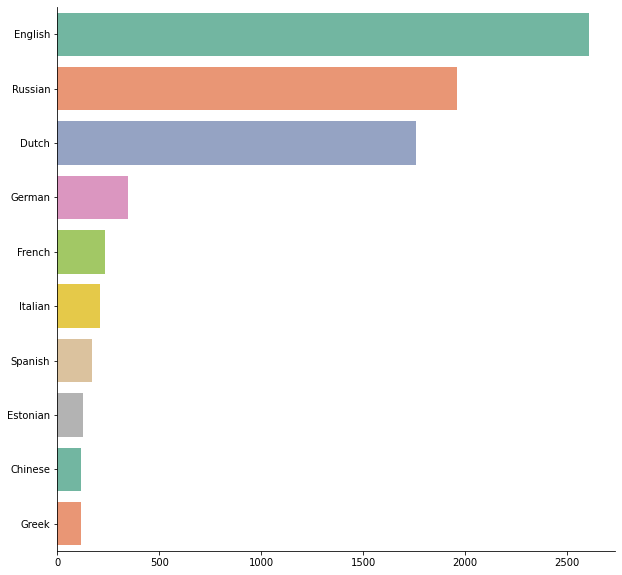

In [34]:
plt.figure(figsize = (10, 10))
sns.barplot(y = data[' mother tongue'].value_counts().sort_values(ascending = False).index[:10], x =  data[' mother tongue'].value_counts().sort_values(ascending = False).values[:10], palette = sns.color_palette("Set2"))
sns.despine()
plt.savefig("genre_dist.png")

c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' age', ylabel='Density'>

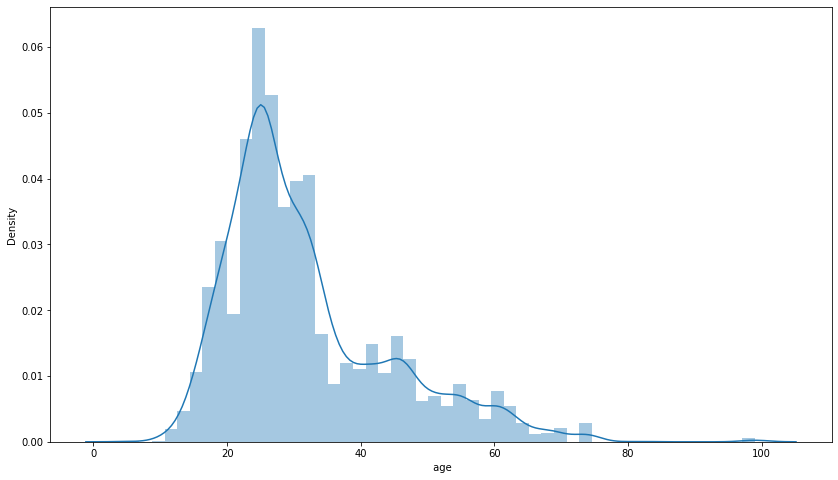

In [448]:
# Age distribution
plt.figure(figsize=(14,8))
sns.distplot(data[' age'])


c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel=' genre', ylabel='count'>

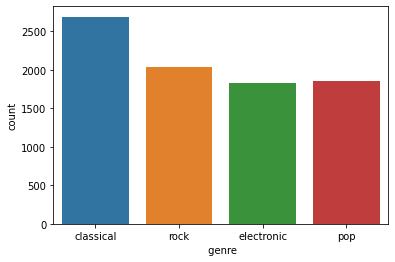

In [449]:
# Genre distibution
sns.countplot(data[' genre'])


<Figure size 720x720 with 0 Axes>

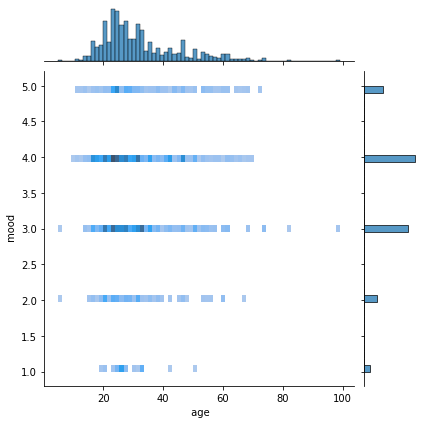

In [19]:
plt.figure(figsize = (10, 10))
sns.jointplot(data=data, x=" age", y=" mood", kind="hist")
# sns.despine()
plt.savefig("genre_dist.png") 


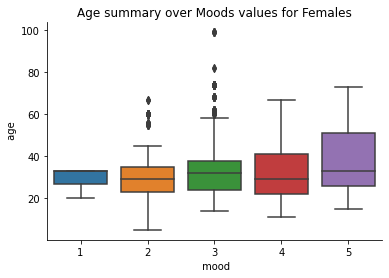

In [27]:
sns.boxplot(data=data[data[' gender']==0], x=" mood", y=" age", dodge=False).set(title="Age summary over Moods values for Females") # Female
sns.despine()
plt.savefig("genre_dist.png") 

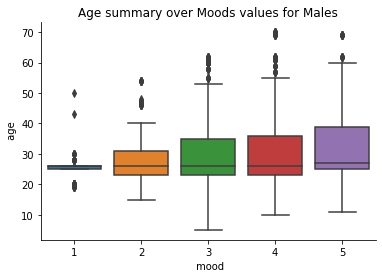

In [26]:
sns.boxplot(data=data[data[' gender']==1], x=" mood", y=" age", dodge=False).set(title="Age summary over Moods values for Males") # Male
sns.despine()
plt.savefig("genre_dist.png") 

In [453]:
# genere and mother tongue relation ( how differnt mother tongue people tend to choose genre )
# relation between age, like_dislike, genre (3d plot)
# relation between gender, like_dislike, genre (3d plot)
# Each emotion by catergory and interactive on different moods (before song), on age and gender
# Frequency and internsity based plots (interactive) (should be able to extract frequency values (averaged over full song or some other aggregation method))
# Region(get based on language) and most chosen genre using cartograms
# Region(get based on language) and variations in frequency values using cartograms
# Clustering frequency embeddings to see similarity like : https://www.kaggle.com/datasets/imsparsh/deam-mediaeval-dataset-emotional-analysis-in-music
# Get music information, like refer this: https://github.com/HuiZhangDB/PMEmo/blob/master/EDA_features_ex.ipynb


In [454]:
# Participants could skip songs and switch between genres, 
# and they were encouraged to do so, because induced emotional response does not automatically occur on every music listening occasion
# Participants could choose genres and skip songs whenever they liked.

# Separate plots for liked and dislike - liking a song/genre does not mean the other part belongs to dislike - it could also mean just neutral emotion. So check both graphs



In [455]:
age_genre = data[[' age', ' genre', 'liked_or_disliked']]
liked_age_genre = age_genre[age_genre['liked_or_disliked'] == 'liked']
disliked_age_genre = age_genre[age_genre['liked_or_disliked'] == 'disliked']

liked_age_genre_grouped = liked_age_genre.groupby([' age', ' genre']).count()
disliked_age_genre_grouped = disliked_age_genre.groupby([' age', ' genre']).count()

liked_final_age_genre = pd.DataFrame(columns = ['age', 'genre', 'l_dl_count'])
for i in range(len(liked_age_genre_grouped)):
  liked_final_age_genre = liked_final_age_genre.append({'age': liked_age_genre_grouped.index.values[i][0], 'genre': liked_age_genre_grouped.index.values[i][1], 'l_dl_count': liked_age_genre_grouped.iloc[i].values[0]}, ignore_index = True)

disliked_final_age_genre = pd.DataFrame(columns = ['age', 'genre', 'l_dl_count'])
for i in range(len(disliked_age_genre_grouped)):
  disliked_final_age_genre = disliked_final_age_genre.append({'age': disliked_age_genre_grouped.index.values[i][0], 'genre': disliked_age_genre_grouped.index.values[i][1], 'l_dl_count': disliked_age_genre_grouped.iloc[i].values[0]}, ignore_index = True)

# Use population pyramid with kde drawn over the bars and separate plots for genres


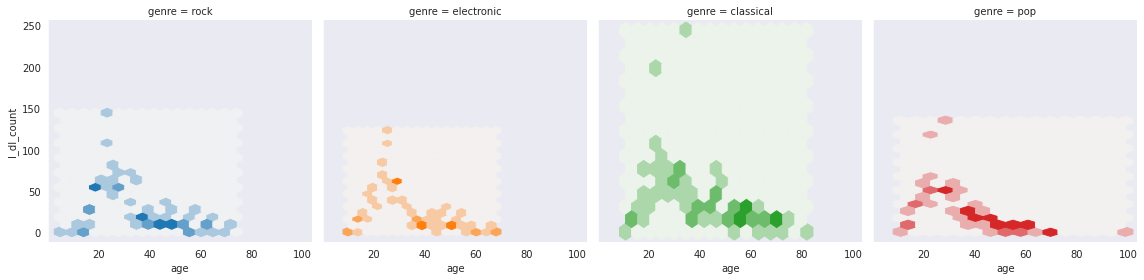

In [456]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(liked_final_age_genre, hue="genre", col="genre", height=4)

g.map(hexbin, "age", "l_dl_count")

In [36]:
# Trying another way:
age_mood = data[[' gender', ' genre', ' age']]
age_mood.columns = ['gender', 'genre', 'age']
print(age_mood.head())

age_r = []
x = 0
y = 10
age_mood['age_range'] = 0

for j in range(10):
    for i in range(len(age_mood)):
        if(int(age_mood.iloc[i]['age']) > int(x)  and int(age_mood.iloc[i]['age']) <=int(y)):
            age_mood['age_range'].iloc[i] = str(x+1) + '-' + str(y)

    x+=10
    y+=10
    
age_mood.drop('age', axis=1, inplace=True)
age_mood['gender_new'] = pd.Series('female', index=age_mood.index).mask(age_mood['gender'] == 1, 'male')
age_mood.drop('gender', axis=1, inplace=True)
age_mood['count'] = 1
agmg = age_mood.groupby(['genre', 'age_range', 'gender_new']).count()

new_df = pd.DataFrame(columns = ['genre', 'age_range', 'male', 'female'])
age_rngs = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'] 
fc_values = [] #(mc, fc)
ix_values = agmg.index.values

for ar in age_rngs:
    for k in ['classical', 'rock', 'electronic', 'pop']:
        fc = 0
        mc = 0
        for i in range(len(agmg)):
            if(ix_values[i][1] == ar and ix_values[i][2] == 'female' and ix_values[i][0] == k):
                fc+= agmg.iloc[i]['count']
            elif(ix_values[i][1] == ar and ix_values[i][2] == 'male' and ix_values[i][0] == k):
                mc+= agmg.iloc[i]['count']
        new_df = new_df.append({'genre':k, 'age_range': ar, 'male': mc, 'female': fc}, ignore_index=True)



   gender      genre   age
0       1  classical  21.0
1       1  classical  41.0
2       1  classical  24.0
3       0  classical  32.0
4       0  classical  21.0


c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [38]:
import altair as alt

genre_nums = {1:'classical', 2:'electronic', 3:'pop', 4:'rock'}
slider = alt.binding_range(min=1, max=4, step=1) # can not add strings so using numbers to represent the genres
select_genre = alt.selection_single(name='slider_on', fields=['genre'],
                                   bind=slider, init={'genre': genre_nums[1]})

base = alt.Chart(new_df).add_selection(
    select_genre
).transform_filter(
    select_genre
).properties(
    width=250
)


chart_m = base.mark_bar().encode(
    x=alt.X('male:Q',
            title='Population',
            sort='descending'),
    y=alt.Y('age_range:N', axis=alt.Axis(title='Age Groups'), sort='descending'),
    color=alt.Color('male')
).properties(title='Male')

yscale = base.encode(
    y=alt.Y('age_range:N', axis=None),
    text=alt.Text('age_range:O'),
).mark_text().properties(width=35)

chart_f = base.mark_bar().encode(
    x=alt.X('female:Q',
            title='Populaion',
            sort='ascending'),
    y=alt.Y('age_range:N', axis=None, sort='descending'),
    color=alt.Color('female')
).properties(title='Female')

alt.concat(chart_m, yscale, chart_f, spacing = 5)

alt.ConcatChart(...)

In [61]:
# EXPLAIN ABOUT SCALES HERE AND IN MOOD CHART

#### Pyramid plot for Gender - Age group, and slider for Mood 

In [39]:
age_mood = data[[' gender', ' mood', ' age']]
age_mood.columns = ['gender', 'mood', 'age']
print(age_mood.head())

age_r = []
x = 0
y = 10
age_mood['age_range'] = 0

for j in range(10):
    for i in range(len(age_mood)):
        if(int(age_mood.iloc[i]['age']) > int(x)  and int(age_mood.iloc[i]['age']) <=int(y)):
            age_mood['age_range'].iloc[i] = str(x+1) + '-' + str(y)

    x+=10
    y+=10
    
age_mood.drop('age', axis=1, inplace=True)
age_mood['gender_new'] = pd.Series('female', index=age_mood.index).mask(age_mood['gender'] == 1, 'male')
age_mood.drop('gender', axis=1, inplace=True)
age_mood['count'] = 1
agmg = age_mood.groupby(['mood', 'age_range', 'gender_new']).sum()

new_df = pd.DataFrame(columns = ['mood', 'age_range', 'male', 'female'])
age_rngs = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'] 
fc_values = [] #(mc, fc)
ix_values = agmg.index.values

for ar in age_rngs:
    for k in [1,2,3,4,5]:
        fc = 0
        mc = 0
        for i in range(len(agmg)):
            if(ix_values[i][1] == ar and ix_values[i][2] == 'female' and ix_values[i][0] == k):
                fc+= agmg.iloc[i]['count']
            elif(ix_values[i][1] == ar and ix_values[i][2] == 'male' and ix_values[i][0] == k):
                mc+= agmg.iloc[i]['count']
        new_df = new_df.append({'mood':k, 'age_range': ar, 'male': mc, 'female': fc}, ignore_index=True)



   gender  mood   age
0       1     3  21.0
1       1     3  41.0
2       1     3  24.0
3       0     3  32.0
4       0     4  21.0


c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [40]:
new_df.tail()

,mood,age_range,male,female
45,1,91-100,0,0
46,2,91-100,0,0
47,3,91-100,0,10
48,4,91-100,0,0
49,5,91-100,0,0


In [106]:

slider = alt.binding_range(min=1, max=5, step=1)
select_mood = alt.selection_single(name='slider_on', fields=['mood'],
                                   bind=slider, init={'mood': 1})

base = alt.Chart(new_df).add_selection(
    select_mood
).transform_filter(
    select_mood
).properties(
    width=250
)


chart_m = base.mark_bar().encode(
    x=alt.X('male:Q',
            title='Population',
            sort='descending'),
    y=alt.Y('age_range:N', axis=None, sort='ascending'),
    color=alt.Color('male')
).properties(
    title="Male",
    width=600,
    height=400,
)

yscale = base.encode(
    y=alt.Y('age_range:N', axis=None, title='Age ranges'),
    text=alt.Text('age_range'),
).mark_text().properties(
    title="Age Range",
    width=50,
    height=400,
)

chart_f = base.mark_bar().encode(
    x=alt.X('female:Q',
            title='Populaion',
            sort='ascending'),
    y=alt.Y('age_range:N', axis=None, sort='ascending'),
    color=alt.Color('female')
).properties(
    title="Female",
    width=600,
    height=400,
)

final_c = alt.concat(chart_m, yscale, chart_f, spacing = 5)
final_c.save('final_c.html')
final_c

alt.ConcatChart(...)

### Emotion felt for people who liked or disliked genre - This is genre specific. We will do frequency specific later. Do with joinplot or swarmplot and then Extend this to condition on Mood. Spider or radar chart

In [68]:
subset = data[[' genre', ' amazement', ' solemnity', ' tenderness', ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension', ' sadness', 'liked_or_disliked']]
subset.columns = ['genre', 'amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness', 'liked_or_disliked']

In [69]:
agmg = subset.groupby(['genre', 'liked_or_disliked']).sum()
agmg

amazement  solemnity  tenderness  nostalgia  \
genre      liked_or_disliked                                                
classical  disliked                  12         38          22         58   
           liked                    411        656         536        618   
electronic disliked                  20         61          10         29   
           liked                    204        364         122        209   
pop        disliked                  17         44          68        107   
           liked                    202        221         408        520   
rock       disliked                  22         41          51        121   
           liked                    231        247         334        509   

                              calmness  power  joyful_activation  tension  \
genre      liked_or_disliked                                                
classical  disliked                 60     16                 45       98   
           liked                   859    372                703      366   
electronic disliked                 71     83                 81      295   
           liked                   438    376                435      398   
pop        disliked                102     40                 48      177   
           liked                   513    186                349      156   
rock       disliked                 82     82                 54      200   
           liked                   436    376                430      200   

                              sadness  
genre      liked_or_disliked           
classical  disliked                63  
           liked                  401  
electronic disliked                69  
           liked                  140  
pop        disliked               143  
           liked                  291  
rock       disliked               144  
           liked                  293

In [70]:
# subset[(subset['genre'] == 'classical') & (subset['liked_or_disliked'] == 'disliked') & (subset['amazement'] == 1)]
emotions = ['amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness']
new_subset = pd.DataFrame(columns = ['genre', 'liked_or_disliked', 'emotion', 'count'])
ix_values = agmg.index.values
for i in range(agmg.shape[0]):
    for em in emotions:
        new_subset = new_subset.append({'genre': ix_values[i][0], 'liked_or_disliked': ix_values[i][1],  'emotion': em, 'count': int(agmg.iloc[i][em])}, ignore_index=True)


In [71]:
new_subset

,genre,liked_or_disliked,emotion,count
0,classical,disliked,amazement,12
1,classical,disliked,solemnity,38
2,classical,disliked,tenderness,22
3,classical,disliked,nostalgia,58
4,classical,disliked,calmness,60
...,...,...,...,...
67,rock,liked,calmness,436
68,rock,liked,power,376
69,rock,liked,joyful_activation,430
70,rock,liked,tension,200


In [76]:
liked_new_subset = new_subset[new_subset['liked_or_disliked'] == 'liked']
alt.Chart(liked_new_subset).mark_line(point=True).encode(
    alt.X('emotion:N', scale=alt.Scale(zero=False)),
    alt.Y('count:Q', scale=alt.Scale(zero=False)),
    color=alt.Color("genre:N")
).properties(
    title="Emotion ratings given by people when they liked the song",
    width=600,
    height=150,
)


alt.Chart(...)

In [77]:
liked_new_subset = new_subset[new_subset['liked_or_disliked'] == 'disliked']
alt.Chart(liked_new_subset).mark_line(point=True).encode(
    alt.X('emotion', scale=alt.Scale(zero=False)),
    alt.Y('count', scale=alt.Scale(zero=False)),
    color=alt.Color("genre:N")
).properties(
    title="Emotion ratings given by people when they disliked the song",
    width=600,
    height=150,
)


alt.Chart(...)

In [74]:
rdr_new_subset = pd.DataFrame(columns = ['genre', 'liked_or_disliked', 'amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness'])
ix_values = agmg.index.values
for i in range(len(ix_values)):
    val = [ix_values[i][0], ix_values[i][1]]
    rdr_new_subset = rdr_new_subset.append({'genre': ix_values[i][0], 'liked_or_disliked': ix_values[i][1]}, ignore_index=True)
    for em in emotions:
        val.append(new_subset[(new_subset['genre'] == ix_values[i][0]) & (new_subset['liked_or_disliked'] == ix_values[i][1]) & (new_subset['emotion'] == em)]['count'].values[0])
    rdr_new_subset.iloc[i] = val 
        

In [ ]:
# Intra-genre ...above is inter genre

In [244]:
# apply normalization techniques
for column in cl_rdr.columns:
    cl_rdr[column] = cl_rdr[column]  / cl_rdr[column].abs().max()



,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness
1,1.0,1.0,1.0,1.0,1.0,0.989362,1.0,0.919598,1.0
3,0.49635,0.554878,0.227612,0.338188,0.509895,1.0,0.618777,1.0,0.349127
5,0.491484,0.33689,0.761194,0.841424,0.597206,0.494681,0.496444,0.39196,0.725686
7,0.562044,0.376524,0.623134,0.823625,0.507567,1.0,0.611664,0.502513,0.730673


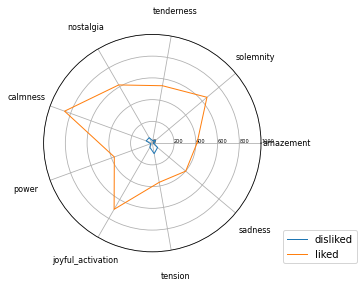

In [268]:
cl_rdr = rdr_new_subset[rdr_new_subset['genre'] == 'classical'].drop(['genre', 'liked_or_disliked'], axis = 1)

from math import pi
df = cl_rdr
df = df.reset_index().drop('index', axis=1)

# number of variable
categories=list(df)[:]
N = len(categories) 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].values.flatten().tolist()
values += values[:1]

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
  
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 200, 400, 600, 800, 1000], ["0","200","400", "600", "800", "1000"], color="black", size=3)
plt.ylim(0,1000)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'disliked')
 
# Fill area




# Electronic
categories=list(df)[:]
N = len(categories) 
values=df.loc[1].values.flatten().tolist()
values += values[:1] 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)  
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_rlabel_position(0)
plt.yticks([0, 200, 400, 600, 800, 1000], ["0","200","400", "600", "800", "1000"], color="black", size=5)
plt.ylim(0,1000)
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'liked')



# Show the graph
plt.legend(bbox_to_anchor=(1.1, 0.1), loc='upper left', borderaxespad=0)
plt.show()



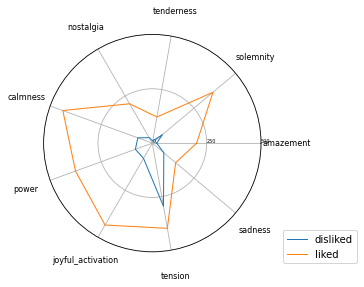

In [607]:
cl_rdr = rdr_new_subset[rdr_new_subset['genre'] == 'electronic'].drop(['genre', 'liked_or_disliked'], axis = 1)

from math import pi
df = cl_rdr
df = df.reset_index().drop('index', axis=1)

# number of variable
categories=list(df)[:]
N = len(categories) 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].values.flatten().tolist()
values += values[:1]

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
  
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 250, 500], ["0","250","500"], color="black", size=5)
plt.ylim(0,500)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'disliked')

# Electronic
categories=list(df)[:]
N = len(categories) 
values=df.loc[1].values.flatten().tolist()
values += values[:1] 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)  
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_rlabel_position(0)
plt.yticks([0, 250, 500], ["0","250","500"], color="black", size=5)
plt.ylim(0,500)
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'liked')

# Show the graph
plt.legend(bbox_to_anchor=(1.1, 0.1), loc='upper left', borderaxespad=0)
plt.show()



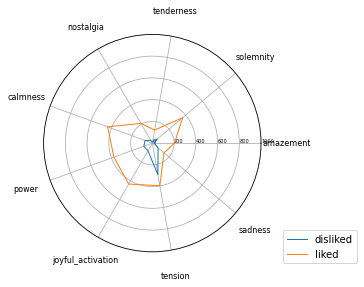

In [267]:
cl_rdr = rdr_new_subset[rdr_new_subset['genre'] == 'electronic'].drop(['genre', 'liked_or_disliked'], axis = 1)

from math import pi
df = cl_rdr
df = df.reset_index().drop('index', axis=1)

# number of variable
categories=list(df)[:]
N = len(categories) 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].values.flatten().tolist()
values += values[:1]

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
  
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 200, 400, 600, 800, 1000], ["0","200","400", "600", "800", "1000"], color="black", size=3)
plt.ylim(0,1000)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'disliked')

# Electronic
categories=list(df)[:]
N = len(categories) 
values=df.loc[1].values.flatten().tolist()
values += values[:1] 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)  
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_rlabel_position(0)
plt.yticks([0, 200, 400, 600, 800, 1000], ["0","200","400", "600", "800", "1000"], color="black", size=5)
plt.ylim(0,1000)
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'liked')

# Show the graph
plt.legend(bbox_to_anchor=(1.1, 0.1), loc='upper left', borderaxespad=0)
plt.show()



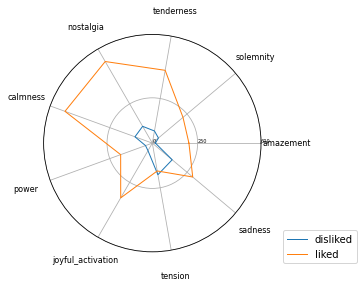

In [85]:
cl_rdr = rdr_new_subset[rdr_new_subset['genre'] == 'pop'].drop(['genre', 'liked_or_disliked'], axis = 1)

from math import pi
df = cl_rdr
df = df.reset_index().drop('index', axis=1)

# number of variable
categories=list(df)[:]
N = len(categories) 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].values.flatten().tolist()
values += values[:1]

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
  
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 250, 600], ["0","250","600"], color="black", size=5)
plt.ylim(0,600)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'disliked')

# Electronic
categories=list(df)[:]
N = len(categories) 
values=df.loc[1].values.flatten().tolist()
values += values[:1] 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)  
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_rlabel_position(0)
plt.yticks([0, 250, 600], ["0","250","600"], color="black", size=5)
plt.ylim(0,600)
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'liked')

# Show the graph
plt.legend(bbox_to_anchor=(1.1, 0.1), loc='upper left', borderaxespad=0)
# plt.show()

plt.savefig('fig1.png')


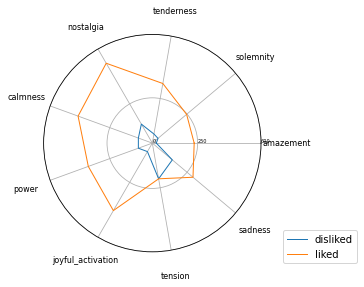

In [84]:
cl_rdr = rdr_new_subset[rdr_new_subset['genre'] == 'rock'].drop(['genre', 'liked_or_disliked'], axis = 1)

from math import pi
df = cl_rdr
df = df.reset_index().drop('index', axis=1)

# number of variable
categories=list(df)[:]
N = len(categories) 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].values.flatten().tolist()
values += values[:1]

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
    
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
  
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0, 250, 600], ["0","250","600"], color="black", size=5)
plt.ylim(0,600)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'disliked')

# Electronic
categories=list(df)[:]
N = len(categories) 
values=df.loc[1].values.flatten().tolist()
values += values[:1] 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)  
plt.xticks(angles[:-1], categories, color='black', size=8)
ax.tick_params(axis='x', which='major', pad=15)
ax.set_rlabel_position(0)
plt.yticks([0, 250, 600], ["0","250","600"], color="black", size=5)
plt.ylim(0,600)
ax.plot(angles, values, linewidth=1, linestyle='solid', label = 'liked')

# Show the graph
plt.legend(bbox_to_anchor=(1.1, 0.1), loc='upper left', borderaxespad=0)
# plt.show()

plt.savefig('fig2.png')

### To know the relationship between mood before listening to songs and the feeling that they get after listening to some genre

In [272]:
# sns.set(style='white')

data.plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title('Customers by Time & Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')


,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,age,gender,mother tongue,liked_or_disliked
0,1,classical,0,1,0,0,0,0,1,1,0,3,21,1,English,liked
1,1,classical,0,0,0,1,0,0,0,0,0,3,41,1,Dutch,disliked
2,1,classical,0,0,0,1,0,0,0,0,1,3,24,1,English,liked
3,1,classical,0,0,0,0,1,0,0,0,0,3,32,0,Spanish,liked
4,1,classical,0,0,0,1,1,0,0,0,0,4,21,0,English,disliked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,400,pop,1,1,0,0,0,0,1,0,0,3,26,1,Russian,liked
8403,400,pop,0,0,0,1,0,0,1,0,1,3,29,0,Russian,disliked
8404,400,pop,0,0,0,0,0,0,0,1,0,4,34,1,Polish,disliked
8405,400,pop,1,0,0,0,0,0,1,1,0,5,39,1,French,liked


In [288]:
data.groupby([' mood', ' genre']).sum()

track id   amazement   solemnity   tenderness   nostalgia  \
 mood  genre                                                                  
1     classical       6608           9          22           18          37   
      electronic     21524           4          21            9          10   
      pop            34162          25           8           34          33   
      rock            7808           4          12           11          16   
2     classical       7190          29          44           32          54   
      electronic     38753          12          39           13          22   
      pop            77629          23          30           55          79   
      rock           34729          20          43           36          65   
3     classical      36773         124         258          186         226   
      electronic    132118          75         120           27          81   
      pop           191861          64          75          152         208   
      rock           94887          82          88          114         222   
4     classical      37026         161         256          229         264   
      electronic    181158          95         174           61          98   
      pop           230777          77         107          176         211   
      rock          111213         106         109          177         250   
5     classical      16569         100         114           93          95   
      electronic     54743          38          71           22          27   
      pop            89682          30          45           59          96   
      rock           33409          41          36           47          77   

                   calmness   power   joyful_activation   tension   sadness  \
 mood  genre                                                                  
1     classical          25      10                  33        39        34   
      electronic         35      16                  23        32        24   
      pop                48      22                  22        13        27   
      rock               17      11                  11         4        14   
2     classical          69      25                  43        25        26   
      electronic         46      27                  44        67        28   
      pop                86      26                  45        42        66   
      rock               53      51                  53        48        54   
3     classical         291     126                 269       173       177   
      electronic        159     119                 166       219        55   
      pop               178      68                 125       103       127   
      rock              173     160                 168       154       150   
4     classical         379     147                 264       152       159   
      electronic        204     223                 214       303        81   
      pop               220      75                 144       119       145   
      rock              205     174                 182       142       173   
5     classical         155      80                 139        75        68   
      electronic         65      74                  69        72        21   
      pop                83      35                  61        56        69   
      rock               70      62                  70        52        46   

                    age   gender  
 mood  genre                      
1     classical    3264       33  
      electronic   2171       73  
      pop          2567       94  
      rock         1306       19  
2     classical    5915       91  
      electronic   5015       82  
      pop          6996      115  
      rock         7203       99  
3     classical   32594      374  
      electronic  16701      211  
      pop         17481      291  
      rock        23312      303  
4     classical   33380      474  
      electroni

In [91]:
# subset[(subset['genre'] == 'classical') & (subset['liked_or_disliked'] == 'disliked') & (subset['amazement'] == 1)]
subset = data[[' mood', ' genre', ' amazement', ' solemnity', ' tenderness', ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension', ' sadness']]
subset.columns = ['mood', 'genre', 'amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness']
agmg = subset.groupby(['mood', 'genre']).sum()
emotions = ['nostalgia', 'calmness', 'joyful_activation', 'tension', 'sadness']

new_subset = pd.DataFrame(columns = ['mood', 'genre', 'emotion', 'count'])
ix_values = agmg.index.values
for i in range(agmg.shape[0]):
    for em in emotions:
        new_subset = new_subset.append({'mood': ix_values[i][0], 'genre': ix_values[i][1],  'emotion': em, 'count': int(agmg.iloc[i][em])}, ignore_index=True)


In [360]:
c1 = alt.Chart(new_subset[new_subset['genre'] == 'classical']).mark_bar().encode(
    x='mood:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 2200])),
    color='emotion'
).properties(
    title="Genre liked by people and their emotion ratings when listening to classical music",
    width=400,
    height=550,
)

c2 = alt.Chart(new_subset[new_subset['genre'] == 'pop']).mark_bar().encode(
    x='mood:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 2200])),
    color='emotion'
).properties(
    title="Genre liked by people and their emotion ratings when listening to pop music",
    width=400,
    height=550,
)

text = alt.Chart(new_subset[new_subset['genre'] == 'pop']).mark_text(dx=-15, dy=3, color='black').encode(
    x='mood:N',
    y='count:Q',
    text=alt.Text('count:Q', format='.1f')
)

(c1 | c2 ).resolve_scale(
    y = 'shared'
)

alt.HConcatChart(...)

In [363]:
c3 = alt.Chart(new_subset[new_subset['genre'] == 'electronic']).mark_bar().encode(
    x='mood:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 2200])),
    color='emotion'
).properties(
    title="Genre liked by people and their emotion ratings when listening to electronic music",
    width=400,
    height=550,
)

c4 = alt.Chart(new_subset[new_subset['genre'] == 'rock']).mark_bar().encode(
    x='mood:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 2200])),
    color='emotion'
).properties(
    title="Genre liked by people and their emotion ratings when listening to rock music",
    width=400,
    height=550,
)


(c3 | c4 ).resolve_scale(
    y = 'shared'
)

alt.HConcatChart(...)

In [92]:
c3 = alt.Chart(new_subset[new_subset['mood'] == 1]).mark_bar().encode(
    x='genre:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 300])),
    color='emotion'
).properties(
    title="Most emotion felt by people with Mood = 1 (Depressed)",
    width=400,
    height=550,
)


c4 = alt.Chart(new_subset[new_subset['mood'] == 2]).mark_bar().encode(
    x='genre:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 500])),
    color='emotion'
).properties(
    title="Most emotion felt by people with Mood = 2 (Sad)",
    width=400,
    height=550,
)

c3 | c4



alt.HConcatChart(...)

In [93]:

c1 = alt.Chart(new_subset[new_subset['mood'] == 3]).mark_bar().encode(
    x='genre:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 2000])),
    color='emotion'
).properties(
    title="Most emotion felt by people with Mood = 3 (Neutral)",
    width=400,
    height=550,
)


c2 = alt.Chart(new_subset[new_subset['mood'] == 4]).mark_bar().encode(
    x='genre:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 2500])),
    color='emotion'
).properties(
    title="Most emotion felt by people with Mood = 4 (Joy)",
    width=400,
    height=550,
)

c1 | c2



alt.HConcatChart(...)

In [94]:

c5 = alt.Chart(new_subset[new_subset['mood'] == 5]).mark_bar().encode(
    x='genre:N',
    y=alt.Y('count:Q', scale=alt.Scale(domain=[0, 1000])),
    color='emotion'
).properties(
    title="Most emotion felt by people with Mood = 5 (Happiest)",
    width=400,
    height=550,
)

c5

alt.Chart(...)

In [334]:
emotions = ['amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness']

base_chart1 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[0])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart2 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[1])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart3 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[2])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart4 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[3])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart5 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[4])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart6 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[5])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart7 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[6])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart8 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[7])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)

base_chart9 = alt.Chart(new_subset[(new_subset['genre'] == 'classical') & (new_subset['emotion'] == emotions[8])]).mark_bar().encode(
    x = "mood:N",
    y="count:Q"
).properties(
    width=300,
    height=200
)


(base_chart1 | base_chart2 | base_chart3 | base_chart4 | base_chart5 | base_chart6 | base_chart7 | base_chart8 | base_chart9).resolve_scale(
    y = 'shared'
)

alt.HConcatChart(...)

### Similarly radar chart for emotions and frequencies. Explaine why it is not good, and do lineplot. Use track ID when doing this part.
### Also, check if when sad person listens to any genre becomes happy or joyful or how his mood changes (on emotion values)  explain this point from stacked bar chart above

### With improvements with interactive (grouped on) on moods and ages. Similarly for intensity

### To make Video or running bar graphs from 20 hz to max 20000 hz and how mood counts change

In [590]:
# import numpy as np
# from scipy.io import wavfile
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.io.wavfile as wav
# import scipy.fftpack as fft

In [589]:
# samplerate, data = wavfile.read("1.wav")
# print(f"Sample rate: {samplerate}")

# length = data.shape[0] / samplerate
# print(f"length = {length}s")

# fft_data = np.fft.fft(data)

# def extract_peak_frequency(data, sampling_rate):
#     fft_data = np.fft.fft(data)
#     freqs = np.fft.fftfreq(len(data))
#     print(np.mean(np.abs(fft_data)), np.mean(np.abs(freqs)))
    
#     peak_coefficient = np.argmax(np.abs(fft_data))
#     peak_freq = freqs[peak_coefficient]

#     return abs(peak_freq * sampling_rate)

# extract_peak_frequency(data, samplerate)


# import librosa
# librosa.load('1.mp3', sr=None)
# from tinytag import TinyTag
# tag = TinyTag.get('1.mp3')

# import_rate, import_data = wav.read('1.wav')
# import_bpm = 62 #manually set

# def average_frequency(rate, data):
#     sample_length = len(data)
#     k = np.arange(sample_length)
#     period = sample_length / rate
#     freqs = (k / period)[range(sample_length // 2)] #right-side frequency range
#     fourier = abs(fft.fft(data * np.hanning(sample_length)) / sample_length) #normalized, not clipped
#     fourier = fourier[range(sample_length // 2)] #clip to right-side
#     power = np.power(fourier, 2.0)
#     return sum(power * freqs) / sum(power)

# def quarter_note_frequencies(rate, data, bpm):
#     notes = []
#     beat_counter = 0
#     slice_size = rate * 60 / bpm #samples per beat
#     print(data.shape, slice_size)
#     beats = len(data) / slice_size #beats per song
#     for sl_ix in range(0, len(data), int(slice_size)):
#         sliced = data[sl_ix: sl_ix + int(slice_size)]
#         beat_counter += 1
#         notes.append(average_frequency(rate * 1.0, sliced))
#     return notes


# import_rate, quarter_note_frequencies(import_rate, import_data, import_bpm)


In [519]:
data[' genre'].value_counts()

classical     2688
rock          2038
pop           1855
electronic    1826
Name:  genre, dtype: int64

In [462]:
# Dummy frequency values for each track
# https://github.com/mdeff/fma
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import utils

tracks = pd.read_csv('fma_metadata/tracks.csv')
genres = pd.read_csv('fma_metadata/genres.csv')
features = pd.read_csv('fma_metadata/features.csv')



c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166

In [463]:
genres.shape, tracks.shape, features.shape

((163, 5), (106576, 53), (106577, 519))

In [516]:
sc = []
for i in features.columns:
    if('spectral_centroid' in i):
        print(i)
        sc.append(i)


spectral_centroid
spectral_centroid.1
spectral_centroid.2
spectral_centroid.3
spectral_centroid.4
spectral_centroid.5
spectral_centroid.6


In [558]:
# For classical
import random

trackids = [tracks[tracks['track.7'] == 'Classical'].reset_index().drop('index', axis=1)[:2688]['Unnamed: 0'].values][0]
trackids = [int(s) for s in trackids]
values1 = []
for i in trackids:
    values1.append( float( features[(features['feature'] == i) | (features['feature'] == str(i))]['spectral_centroid.2'].values[0] ) )

values2 = [float(s + 260) for s in values1]
values3 = [float(s + 600) for s in values1]
final_freqs_classical = values1 + values2 + values3
random.shuffle(final_freqs_classical)    


In [567]:
# For electronic
import random

trackids = [tracks[tracks['track.7'] == 'Electronic'].reset_index().drop('index', axis=1)[:1826]['Unnamed: 0'].values][0]
trackids = [int(s) for s in trackids]
values1 = []
for i in trackids:
    values1.append( float( features[(features['feature'] == i) | (features['feature'] == str(i))]['spectral_centroid.2'].values[0] ) )

values2 = [float(s + 260) for s in values1]
values3 = [float(s + 600) for s in values1]
final_freqs_electronic = values1 + values2 + values3
random.shuffle(final_freqs_electronic)    


In [566]:
# For pop
import random

trackids = [tracks[tracks['track.7'] == 'Pop'].reset_index().drop('index', axis=1)[:1855]['Unnamed: 0'].values][0]
trackids = [int(s) for s in trackids]
values1 = []
for i in trackids:
    values1.append( float( features[(features['feature'] == i) | (features['feature'] == str(i))]['spectral_centroid.2'].values[0] ) )

values2 = [float(s + 260) for s in values1]
values3 = [float(s + 600) for s in values1]
final_freqs_pop = values1 + values2 + values3
random.shuffle(final_freqs_pop)    


In [565]:
# For rock
import random

trackids = [tracks[tracks['track.7'] == 'Rock'].reset_index().drop('index', axis=1)[:2038]['Unnamed: 0'].values][0]
trackids = [int(s) for s in trackids]
values1 = []
for i in trackids:
    values1.append( float( features[(features['feature'] == i) | (features['feature'] == str(i))]['spectral_centroid.2'].values[0] ) )

values2 = [float(s + 260) for s in values1]
values3 = [float(s + 600) for s in values1]
final_freqs_rock = values1 + values2 + values3
random.shuffle(final_freqs_rock)    


In [578]:
to_add = final_freqs_classical[:2688] + final_freqs_rock[:2038] + final_freqs_pop[:1855] + final_freqs_electronic[:1826] 

In [797]:
# Add them to original dataset
prev = 1
freqs = []
for i in range(len(data)):
    if(data.iloc[i][' genre'] == 'classical'):
        current = data.iloc[i]['track id']
        if(current == prev):
            freqs.append(int(final_freqs_classical[prev]))
        else:
            prev = current
            freqs.append(int(final_freqs_classical[prev]))

prev = 101
for i in range(len(data)):
    if(data.iloc[i][' genre'] == 'rock'):
        current = data.iloc[i]['track id']
        if(current == prev):
            freqs.append(int(final_freqs_rock[prev]))
        else:
            prev = current
            freqs.append(int(final_freqs_rock[prev]))

prev = 201
for i in range(len(data)):
    if(data.iloc[i][' genre'] == 'electronic'):
        current = data.iloc[i]['track id']
        if(current == prev):
            freqs.append(int(final_freqs_electronic[prev]))
        else:
            prev = current
            freqs.append(int(final_freqs_electronic[prev]))
            
prev = 301
for i in range(len(data)):
    if(data.iloc[i][' genre'] == 'pop'):
        current = data.iloc[i]['track id']
        if(current == prev):
            freqs.append(int(final_freqs_pop[prev]))
        else:
            prev = current
            freqs.append(int(final_freqs_pop[prev]))



In [799]:
data['freqs'] = freqs

In [800]:
data.to_csv('updated_data1.csv', index=False)
data = pd.read_csv('updated_data1.csv')

In [801]:
data.dtypes

track id                int64
 genre                 object
 amazement              int64
 solemnity              int64
 tenderness             int64
 nostalgia              int64
 calmness               int64
 power                  int64
 joyful_activation      int64
 tension                int64
 sadness                int64
 mood                   int64
 age                  float64
 gender                 int64
 mother tongue         object
liked_or_disliked      object
freqs                   int64
dtype: object

c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


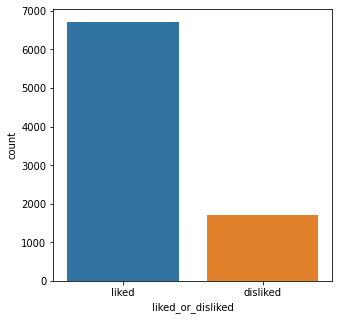

In [104]:
# Checking distribution of float data
data[' age'] = data[' age'].astype('float64')
float_df = data.select_dtypes(include='float64')
float_df['liked_or_disliked'] = data['liked_or_disliked'] 

plt.figure(figsize = (5, 5))
# ax = sns.pairplot(float_df, diag_kind = 'kde',  hue="liked_or_disliked") 
ax = sns.countplot(data = float_df, x = 'liked_or_disliked')
# plt.show()
plt.savefig('hist.png')

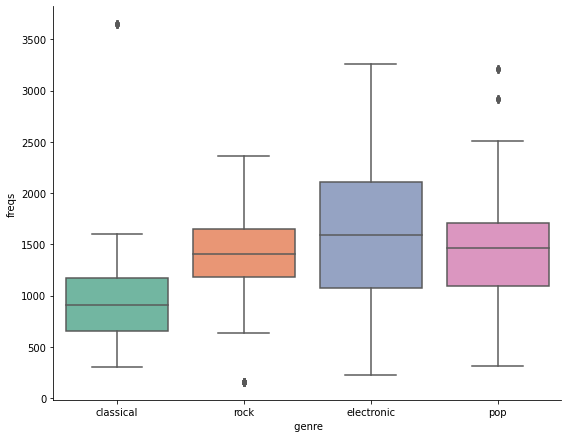

In [803]:

grped_bplot = sns.catplot(x=' genre', 
                          y='freqs',
                          kind="box",
                          legend=False,
                          height=6, 
                          aspect=1.3,
                          palette="Set2",
                          data=data);

# handles, labels = grped_bplot.get_legend_handles_labels()
# specify just one legend


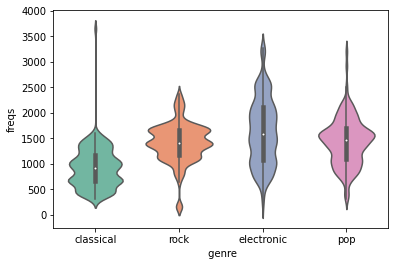

In [804]:
grped_bplot = sns.violinplot(x=' genre', 
                          y='freqs',
                          kind="box",
                          legend=False,
                          height=6, 
                          aspect=1.3,
                          palette="Set2",
                          data=data);

# handles, labels = grped_bplot.get_legend_handles_labels()
# specify just one legend


c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

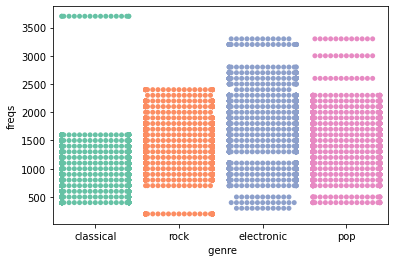

In [844]:
grped_bplot = sns.swarmplot(x=' genre', 
                          y='freqs',
                          palette="Set2",
                          data=data);

# specify just one legend


In [761]:
# Round off freqs
data['freqs'] = data['freqs'].astype(int)

In [806]:
def roundup(x):
    return x if x % 100 == 0 else x + 100 - x % 100

data['freqs'] = data['freqs'].apply(roundup)

In [816]:
# Freqs and emotions
subset = data[['freqs', ' genre', ' amazement', ' solemnity', ' tenderness', ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension', ' sadness']]
subset.columns = ['freqs', 'genre', 'amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness']

agmg = subset.groupby(['genre', 'freqs']).sum()
emotions = ['amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness']

new_subset = pd.DataFrame(columns = ['freqs', 'genre', 'emotion', 'count'])
ix_values = agmg.index.values
for i in range(agmg.shape[0]):
    for em in emotions:
        new_subset = new_subset.append({'genre': ix_values[i][0], 'freqs': ix_values[i][1],  'emotion': em, 'count': int(agmg.iloc[i][em])}, ignore_index=True)


In [817]:
new_subset

,freqs,genre,emotion,count
0,400,classical,amazement,16
1,400,classical,solemnity,47
2,400,classical,tenderness,41
3,400,classical,nostalgia,61
4,400,classical,calmness,70
...,...,...,...,...
724,2400,rock,calmness,9
725,2400,rock,power,2
726,2400,rock,joyful_activation,5
727,2400,rock,tension,2


In [856]:
zz = new_subset[new_subset['genre'] == 'classical']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tensions')]
         
c = alt.Chart(zz1).mark_line(point=True).encode(
    alt.X('freqs', scale=alt.Scale(zero=False)),
    alt.Y('count', scale=alt.Scale(zero=False)),
    color="emotion"
)

c


alt.Chart(...)

In [859]:
# Male 
zz = new_subset[new_subset['genre'] == 'classical']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tensions')]
zz1 = zz[(zz['emotion'] == 'calmness') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension') | (zz['emotion'] == 'nostalgia')]
zz1 = zz1[zz1['freqs'] < 2200]

selection = alt.selection_multi(fields=['emotion'], bind='legend')

c5 = alt.Chart(zz1).mark_line(point=True).encode(
    alt.X('freqs', scale=alt.Scale(zero=False)),
    alt.Y('count', scale=alt.Scale(zero=False)),
    color="emotion",
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
).properties(
    width=1000,
    height=150,
)

c5
# c5.save('c5.html')


alt.Chart(...)

In [860]:
# Male 
zz = new_subset[new_subset['genre'] == 'electronic']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tensions')]
zz1 = zz[(zz['emotion'] == 'calmness') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension') | (zz['emotion'] == 'nostalgia')]
zz1 = zz1[zz1['freqs'] < 2200]

selection = alt.selection_multi(fields=['emotion'], bind='legend')

c5 = alt.Chart(zz1).mark_line(point=True).encode(
    alt.X('freqs', scale=alt.Scale(zero=False)),
    alt.Y('count', scale=alt.Scale(zero=False)),
    color="emotion",
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
).properties(
    width=1000,
    height=150,
)

c5
# c5.save('c5.html')


alt.Chart(...)

In [861]:
# Male 
zz = new_subset[new_subset['genre'] == 'pop']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tensions')]
zz1 = zz[(zz['emotion'] == 'calmness') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension') | (zz['emotion'] == 'nostalgia')]
zz1 = zz1[zz1['freqs'] < 2200]

selection = alt.selection_multi(fields=['emotion'], bind='legend')

c5 = alt.Chart(zz1).mark_line(point=True).encode(
    alt.X('freqs', scale=alt.Scale(zero=False)),
    alt.Y('count', scale=alt.Scale(zero=False)),
    color="emotion",
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
).properties(
    width=1000,
    height=150,
)

c5
# c5.save('c5.html')


alt.Chart(...)

In [862]:
# Male 
zz = new_subset[new_subset['genre'] == 'rock']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tensions')]
zz1 = zz[(zz['emotion'] == 'calmness') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension') | (zz['emotion'] == 'nostalgia')]
zz1 = zz1[zz1['freqs'] < 2200]

selection = alt.selection_multi(fields=['emotion'], bind='legend')

c5 = alt.Chart(zz1).mark_line(point=True).encode(
    alt.X('freqs', scale=alt.Scale(zero=False)),
    alt.Y('count', scale=alt.Scale(zero=False)),
    color="emotion",
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
).properties(
    width=1000,
    height=150,
)

c5
# c5.save('c5.html')


alt.Chart(...)

In [863]:
# Below explain first and then the upper chart - zeros in below chart does not mean they hit low ( it just means there is not data there)which can be seen from upper chart 
# and also converging at some frequencies - neutral emotion.

In [826]:
zz = new_subset[new_subset['genre'] == 'classical']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension')]
zz1 = zz1[zz1['freqs'] < 2200]
c1 = alt.Chart(zz1).mark_rect().encode(
    x='freqs:O',
    y='emotion:O',
    color='count:Q'
).properties(
    width=700,
    height=250,
)


c1
# c1 | c2 | c3 | c4

alt.Chart(...)

In [827]:
zz = new_subset[new_subset['genre'] == 'pop']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension')]
zz1 = zz1[zz1['freqs'] < 2200]
c2 = alt.Chart(zz1).mark_rect().encode(
    x='freqs:O',
    y='emotion:O',
    color='count:Q'
).properties(
    width=700,
    height=250,
)
c2

alt.Chart(...)

In [828]:

zz = new_subset[new_subset['genre'] == 'rock']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension')]
zz1 = zz1[zz1['freqs'] < 2200]
c3 = alt.Chart(zz1).mark_rect().encode(
    x='freqs:O',
    y='emotion:O',
    color='count:Q'
).properties(
    width=700,
    height=250,
)
c3

alt.Chart(...)

In [829]:
zz = new_subset[new_subset['genre'] == 'electronic']
zz1 = zz[(zz['emotion'] == 'amazement') | (zz['emotion'] == 'power') | (zz['emotion'] == 'sadness') | (zz['emotion'] == 'joyful_activation') | (zz['emotion'] == 'tension')]
zz1 = zz1[zz1['freqs'] < 2200]
c4 = alt.Chart(zz1).mark_rect().encode(
    x='freqs:O',
    y='emotion:O',
    color='count:Q'
).properties(
    width=700,
    height=250,
)
c4

alt.Chart(...)

In [842]:
# selection = alt.selection_multi(fields=['emotion'], bind='legend')

# alt.Chart(zz1).mark_area().encode(
#     alt.X('freqs:Q'),
#     alt.Y('count:Q', stack='center', axis=None),
#     alt.Color('emotion:N', scale=alt.Scale(scheme='category20b')),
#     opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
# ).add_selection(
#     selection
# )

In [911]:
# Ultimately, regardless of genre, if you are a male in some x mood, you can listen to y freq to be more calm and happy
# Ultimately, regardless of genre, if you are a male in some x mood, you can listen to y freq to be more sad and tension for some reason

subset = data[['freqs', ' genre', ' amazement', ' solemnity', ' tenderness', ' nostalgia', ' calmness', ' power', ' joyful_activation', ' tension', ' sadness', ' gender', ' mood']]
subset.columns = ['freqs', 'genre', 'amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness', 'gender', 'mood']

agmg = subset.groupby(['genre', 'freqs', 'gender', 'mood']).sum()
emotions = ['amazement', 'solemnity', 'tenderness', 'nostalgia', 'calmness', 'power', 'joyful_activation', 'tension', 'sadness']

new_subset = pd.DataFrame(columns = ['freqs', 'genre', 'emotion', 'count', 'gender', 'mood'])
ix_values = agmg.index.values
for i in range(agmg.shape[0]):
    for em in emotions:
        new_subset = new_subset.append({'genre': ix_values[i][0], 'freqs': ix_values[i][1],  'emotion': em, 'count': int(agmg.iloc[i][em]), 'gender': 'Male' if ix_values[i][2] == 0 else 'Female', 'mood':ix_values[i][3]}, ignore_index=True)

new_subset['freqs'] = new_subset['freqs'].astype(int)
new_subset['count'] = new_subset['count'].astype(int)

In [938]:

female_male = pd.DataFrame(columns = ['gender', 'freqs', 'emotion', 'mood'])

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':5}, ignore_index=True)


male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':5}, ignore_index=True)



male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'calmness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'calmness', 'mood':5}, ignore_index=True)


male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'joyful_activation')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'joyful_activation', 'mood':5}, ignore_index=True)




male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':5}, ignore_index=True)


male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Male') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Male', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':5}, ignore_index=True)


male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'sadness')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'sadness', 'mood':5}, ignore_index=True)


male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 1) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':1}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 2) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':2}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 3) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':3}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 4) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':4}, ignore_index=True)

male_sb = new_subset[(new_subset['gender'] == 'Female') & (new_subset['mood'] == 5) & (new_subset['emotion'] == 'tension')].reset_index()
female_male= female_male.append({'gender': 'Female', 'freqs': male_sb.iloc[male_sb['count'].idxmax()]['freqs'],  'emotion': 'tension', 'mood':5}, ignore_index=True)




In [939]:
female_male

,gender,freqs,emotion,mood
0,Male,700,calmness,1
1,Male,1600,calmness,2
2,Male,700,calmness,3
3,Male,700,calmness,4
4,Male,700,calmness,5
5,Male,1000,joyful_activation,1
6,Male,1400,joyful_activation,2
7,Male,700,joyful_activation,3
8,Male,1100,joyful_activation,4
9,Male,700,joyful_activation,5


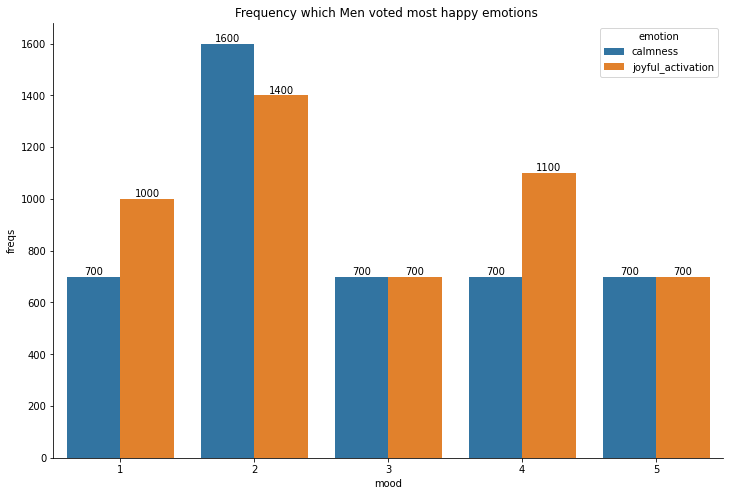

In [962]:
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=female_male[(female_male['gender'] == 'Male') & ((female_male['emotion'] == 'calmness') | (female_male['emotion'] == 'joyful_activation'))], x="mood", y="freqs", hue="emotion", 
)
plt.title('Frequency which Men voted most happy emotions - any genre')
sns.despine()
for i in ax.containers:
    ax.bar_label(i,)

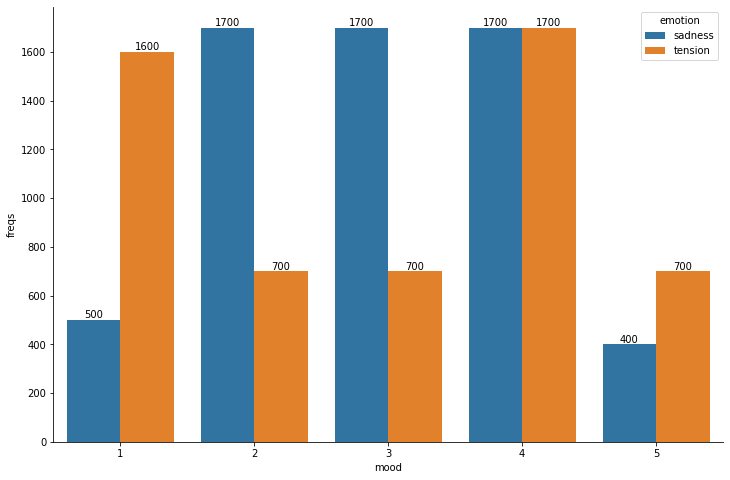

In [960]:
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=female_male[(female_male['gender'] == 'Male') & ((female_male['emotion'] == 'sadness') | (female_male['emotion'] == 'tension'))], x="mood", y="freqs", hue="emotion", 
)
plt.title('Frequency which Men voted most sad emotions - any genre')
sns.despine()
for i in ax.containers:
    ax.bar_label(i,)

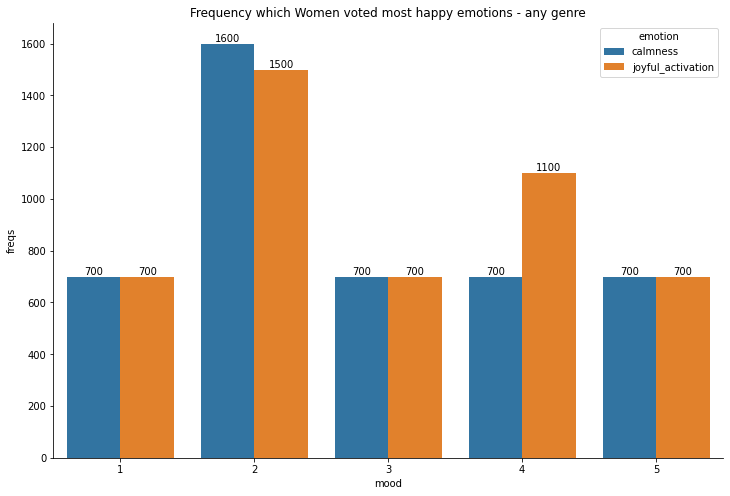

In [964]:
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=female_male[(female_male['gender'] == 'Female') & ((female_male['emotion'] == 'calmness') | (female_male['emotion'] == 'joyful_activation'))], x="mood", y="freqs", hue="emotion", 
)
plt.title('Frequency which Women voted most happy emotions - any genre')
sns.despine()
for i in ax.containers:
    ax.bar_label(i,)

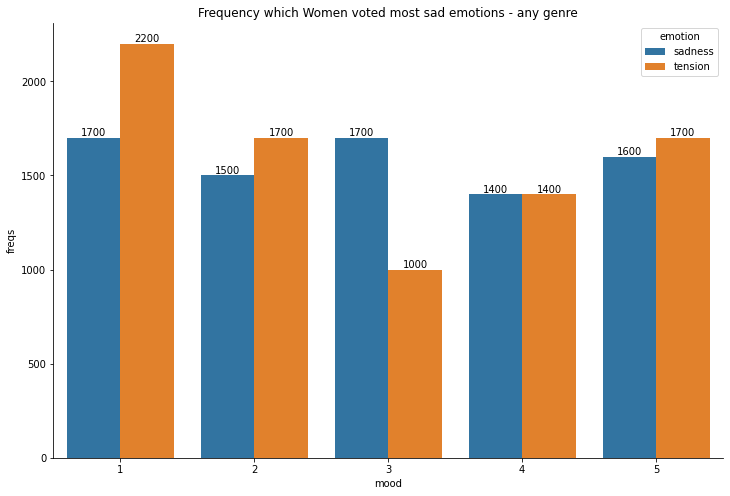

In [966]:
plt.figure(figsize=(12,8))
ax = sns.barplot(
    data=female_male[(female_male['gender'] == 'Female') & ((female_male['emotion'] == 'sadness') | (female_male['emotion'] == 'tension'))], x="mood", y="freqs", hue="emotion", 
)
plt.title('Frequency which Women voted most sad emotions - any genre')
sns.despine()
for i in ax.containers:
    ax.bar_label(i,)